# Exploratory Data Analysis

## Import Tool

In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline as imbl_pipe
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

C:\Users\HP\anaconda3\envs\EnvTensorFlow\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Dataset

In [3]:
read_file = pd.read_csv (r'train_fktp.csv',
                         names=['PSTV01','PSTV02','PSTV15','FKP02','FKP03','FKP04','FKP05','FKP06','FKP07',
                                'FKP08','FKP09','FKP10','FKP11','FKP12','FKP14','FKP14A','FKP15','FKP15A',
                                'FKP16','FKP17','FKP18','FKP19','FKP20','FKP21','FKP22','FKP13Class'])

In [4]:
read_file

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,...,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01.1,61,6108,3,1,...,9999.1,9999.2,98,9998,98.1,98.2,98.3,98.4,2.1,Sehat
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,...,K297,"Gastritis, unspecified",98,9998,98.0,98.0,98.0,98.0,1.0,Belum_Sehat
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,...,Z309,"Contraceptive management, unspecified",98,9998,98.0,98.0,98.0,98.0,1.0,Belum_Sehat
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,...,I10,Essential (primary) hypertension,98,9998,98.0,98.0,98.0,98.0,1.0,Belum_Sehat
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,...,I110,Hypertensive heart disease with (congestive) h...,98,9998,98.0,98.0,98.0,98.0,1.0,Belum_Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056893,212666736.0,91270403,14.246229,1285820875,2020-07-29,2020-07-29,35,3505,9,3,...,9999,9999,98,9998,98.0,98.0,98.0,98.0,2.0,Sehat
4056894,30859241.0,30859241,3.886934,315641120P000514,2020-11-14,2020-11-14,35,3514,9,2,...,H269,"Cataract, unspecified",35,3514,9.0,2.0,14.0,99.0,1.0,Belum_Sehat
4056895,8859416.0,8859416,6.146070,962412926,2019-08-16,2019-08-16,11,1171,4,2,...,9999,9999,98,9998,98.0,98.0,98.0,98.0,2.0,Sehat
4056896,399491834.0,399491834,26.548826,273170420P000003,2020-04-01,2020-04-01,74,7402,3,1,...,K30,Dyspepsia,98,9998,98.0,98.0,98.0,98.0,1.0,Belum_Sehat


Menambah Nama Variabel Sesuai Metadata.xlsx

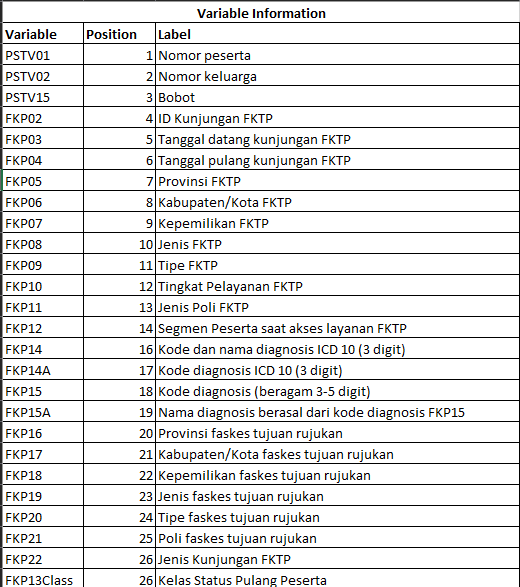

In [5]:
df = read_file
df

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,...,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01.1,61,6108,3,1,...,9999.1,9999.2,98,9998,98.1,98.2,98.3,98.4,2.1,Sehat
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,...,K297,"Gastritis, unspecified",98,9998,98.0,98.0,98.0,98.0,1.0,Belum_Sehat
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,...,Z309,"Contraceptive management, unspecified",98,9998,98.0,98.0,98.0,98.0,1.0,Belum_Sehat
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,...,I10,Essential (primary) hypertension,98,9998,98.0,98.0,98.0,98.0,1.0,Belum_Sehat
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,...,I110,Hypertensive heart disease with (congestive) h...,98,9998,98.0,98.0,98.0,98.0,1.0,Belum_Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056893,212666736.0,91270403,14.246229,1285820875,2020-07-29,2020-07-29,35,3505,9,3,...,9999,9999,98,9998,98.0,98.0,98.0,98.0,2.0,Sehat
4056894,30859241.0,30859241,3.886934,315641120P000514,2020-11-14,2020-11-14,35,3514,9,2,...,H269,"Cataract, unspecified",35,3514,9.0,2.0,14.0,99.0,1.0,Belum_Sehat
4056895,8859416.0,8859416,6.146070,962412926,2019-08-16,2019-08-16,11,1171,4,2,...,9999,9999,98,9998,98.0,98.0,98.0,98.0,2.0,Sehat
4056896,399491834.0,399491834,26.548826,273170420P000003,2020-04-01,2020-04-01,74,7402,3,1,...,K30,Dyspepsia,98,9998,98.0,98.0,98.0,98.0,1.0,Belum_Sehat


Data target diubah menjadi boolean supaya mudah dalam penargetannya

1 -> Sehat
0 -> Belum Sehat

In [6]:
df['FKP13Class'].replace('Sehat', 1, inplace = True)
df['FKP13Class'].replace('Belum_Sehat', 0, inplace = True)

In [7]:
data = df.copy()
data.sample(3)

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,...,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
3502750,221746090.0,221746090,25.652096,365170619P000175,2019-06-19,2019-06-19,33,3303,9,3,...,K040,Pulpitis,98,9998,98.0,98.0,98.0,98.0,1.0,0
1216949,75096318.0,106200945,1.680836,269470919P000686,2019-09-26,2019-09-26,35,3518,9,3,...,J00,Acute nasopharyngitis [common cold],98,9998,98.0,98.0,98.0,98.0,1.0,0
1085302,64329270.0,64329270,68.389023,85971219P000518,2019-12-30,2019-12-30,33,3304,3,1,...,I10,Essential (primary) hypertension,98,9998,98.0,98.0,98.0,98.0,1.0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056898 entries, 0 to 4056897
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   PSTV01      float64
 1   PSTV02      int64  
 2   PSTV15      float64
 3   FKP02       object 
 4   FKP03       object 
 5   FKP04       object 
 6   FKP05       int64  
 7   FKP06       int64  
 8   FKP07       int64  
 9   FKP08       int64  
 10  FKP09       int64  
 11  FKP10       float64
 12  FKP11       float64
 13  FKP12       int64  
 14  FKP14       int64  
 15  FKP14A      object 
 16  FKP15       object 
 17  FKP15A      object 
 18  FKP16       int64  
 19  FKP17       int64  
 20  FKP18       float64
 21  FKP19       float64
 22  FKP20       float64
 23  FKP21       float64
 24  FKP22       float64
 25  FKP13Class  int64  
dtypes: float64(9), int64(11), object(6)
memory usage: 804.7+ MB


## Statistika Deskriptif

### Cek Data Duplikat

In [9]:
print("Data Duplikat =", data.duplicated().sum())

Data Duplikat = 0


### Cek Nilai Yang Hilang

In [10]:
(data.isnull().sum()/len(data)).to_frame('Presentase Hilang')

,Presentase Hilang
PSTV01,0.000000e+00
PSTV02,0.000000e+00
PSTV15,0.000000e+00
FKP02,0.000000e+00
FKP03,0.000000e+00
FKP04,0.000000e+00
FKP05,0.000000e+00
FKP06,0.000000e+00
FKP07,0.000000e+00
FKP08,0.000000e+00


In [11]:
data.isna().sum().sort_values(ascending=False)

FKP14A        1380240
FKP11               1
PSTV01              0
FKP14               0
FKP22               0
FKP21               0
FKP20               0
FKP19               0
FKP18               0
FKP17               0
FKP16               0
FKP15A              0
FKP15               0
FKP12               0
PSTV02              0
FKP10               0
FKP09               0
FKP08               0
FKP07               0
FKP06               0
FKP05               0
FKP04               0
FKP03               0
FKP02               0
PSTV15              0
FKP13Class          0
dtype: int64

Terdapat missing values pada kolom:

*   FKP14A sebanyak 1380240
*   FKP11 sebanyak 1

### Cek Angka Unik

In [12]:
data.nunique()

PSTV01         832023
PSTV02         438280
PSTV15          50390
FKP02         4056898
FKP03             731
FKP04             737
FKP05              34
FKP06             509
FKP07               9
FKP08               6
FKP09               9
FKP10               4
FKP11              26
FKP12               5
FKP14            1837
FKP14A           1837
FKP15            9666
FKP15A           9661
FKP16              35
FKP17             482
FKP18              11
FKP19               4
FKP20              27
FKP21               3
FKP22               3
FKP13Class          2
dtype: int64

In [13]:
# Mengelompokkan kolom berdasarkan jenis datanya
nums = ['PSTV01','PSTV02','PSTV15','FKP05','FKP06','FKP07','FKP08','FKP09','FKP10','FKP11','FKP12','FKP14',
        'FKP16','FKP17','FKP18','FKP19','FKP20','FKP21','FKP22']
cats = ['FKP02','FKP03','FKP04','FKP14A','FKP15','FKP15A']

### Data Numerik

In [14]:
data[nums].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056898 entries, 0 to 4056897
Data columns (total 19 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PSTV01  float64
 1   PSTV02  int64  
 2   PSTV15  float64
 3   FKP05   int64  
 4   FKP06   int64  
 5   FKP07   int64  
 6   FKP08   int64  
 7   FKP09   int64  
 8   FKP10   float64
 9   FKP11   float64
 10  FKP12   int64  
 11  FKP14   int64  
 12  FKP16   int64  
 13  FKP17   int64  
 14  FKP18   float64
 15  FKP19   float64
 16  FKP20   float64
 17  FKP21   float64
 18  FKP22   float64
dtypes: float64(9), int64(10)
memory usage: 588.1 MB


In [15]:
data[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PSTV01,4056898.0,9.153457e+07,8.994426e+07,15.000000,3.377226e+07,6.760764e+07,1.015584e+08,4.553885e+08
PSTV02,4056898.0,9.488335e+07,8.852257e+07,15.000000,3.577565e+07,7.181594e+07,1.113200e+08,4.553824e+08
PSTV15,4056898.0,1.056512e+02,1.886474e+02,0.510698,1.676808e+01,5.147561e+01,1.282688e+02,3.035342e+04
FKP05,4056898.0,3.608867e+01,1.870093e+01,11.000000,3.100000e+01,3.300000e+01,3.600000e+01,9.400000e+01
FKP06,4056898.0,3.636691e+03,1.869268e+03,1101.000000,3.171000e+03,3.318000e+03,3.603000e+03,9.471000e+03
FKP07,4056898.0,5.652855e+00,2.935862e+00,1.000000,3.000000e+00,3.000000e+00,9.000000e+00,9.000000e+00
FKP08,4056898.0,1.677882e+00,8.353439e-01,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00
FKP09,4056898.0,2.709430e+00,1.312048e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.000000e+01
FKP10,4056898.0,1.064594e+00,3.403495e-01,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
FKP11,4056897.0,5.239783e+00,5.678255e+00,1.000000,1.000000e+00,1.000000e+00,1.200000e+01,2.800000e+01


### Data Kategorik

In [16]:
data[cats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056898 entries, 0 to 4056897
Data columns (total 6 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   FKP02   object
 1   FKP03   object
 2   FKP04   object
 3   FKP14A  object
 4   FKP15   object
 5   FKP15A  object
dtypes: object(6)
memory usage: 185.7+ MB


In [17]:
data[cats].describe().transpose()

,count,unique,top,freq
FKP02,4056898,4056898,958073632,1
FKP03,4056898,731,2020-02-10,10175
FKP04,4056898,737,2020-02-10,10180
FKP14A,2676658,1837,J06,238562
FKP15,4056898,9666,9999,1380240
FKP15A,4056898,9661,9999,1380240


### Value Counting

In [18]:
for col in cats:
    print(f"Value count column {col}:")
    print(data[col].value_counts())
    print()

Value count column FKP02:
958073632           1
259320919P000811    1
804269476           1
387880120P000493    1
349651019P002103    1
                   ..
30060219P000030     1
1326480344          1
1121180537          1
319090320P002037    1
1188955927          1
Name: FKP02, Length: 4056898, dtype: int64

Value count column FKP03:
2020-02-10    10175
2020-03-09    10114
2020-03-16    10019
2020-03-02     9995
2020-01-13     9970
              ...  
2020-04-19      751
2020-05-25      743
2020-05-31      678
2020-07-31      616
2020-05-24      403
Name: FKP03, Length: 731, dtype: int64

Value count column FKP04:
2020-02-10      10180
2020-03-09      10092
2020-03-16      10027
2020-01-13       9994
2020-03-02       9983
                ...  
2021-01-02         11
2021-01-03          5
2021-01-04          3
2019-08-01.1        1
2021-01-09          1
Name: FKP04, Length: 737, dtype: int64

Value count column FKP14A:
J06    238562
I10    165252
J00    157014
K30    106718
M79    1064

## Analisis Univariat

In [19]:
data.describe()

,PSTV01,PSTV02,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
count,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056897e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06
mean,9.153457e+07,9.488335e+07,1.056512e+02,3.608867e+01,3.636691e+03,5.652855e+00,1.677882e+00,2.709430e+00,1.064594e+00,5.239783e+00,3.489451e+00,3.936370e+03,9.223593e+01,9.406489e+03,8.944209e+01,8.893204e+01,9.169130e+01,9.809351e+01,1.340221e+00,3.506095e-01
std,8.994426e+07,8.852257e+07,1.886474e+02,1.870093e+01,1.869268e+03,2.935862e+00,8.353439e-01,1.312048e+00,3.403495e-01,5.678255e+00,1.384493e+00,4.365511e+03,1.877501e+01,1.922342e+03,2.665995e+01,2.823298e+01,1.973518e+01,2.911491e-01,4.737834e-01,4.771609e-01
min,1.500000e+01,1.500000e+01,5.106980e-01,1.100000e+01,1.101000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,1.101000e+03,1.000000e+00,1.000000e+00,5.000000e+00,9.800000e+01,1.000000e+00,0.000000e+00
25%,3.377226e+07,3.577565e+07,1.676808e+01,3.100000e+01,3.171000e+03,3.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,6.920000e+02,9.800000e+01,9.998000e+03,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,1.000000e+00,0.000000e+00
50%,6.760764e+07,7.181594e+07,5.147561e+01,3.300000e+01,3.318000e+03,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,9.510000e+02,9.800000e+01,9.998000e+03,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,1.000000e+00,0.000000e+00
75%,1.015584e+08,1.113200e+08,1.282688e+02,3.600000e+01,3.603000e+03,9.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00,1.200000e+01,5.000000e+00,9.999000e+03,9.800000e+01,9.998000e+03,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,2.000000e+00,1.000000e+00
max,4.553885e+08,4.553824e+08,3.035342e+04,9.400000e+01,9.471000e+03,9.000000e+00,7.000000e+00,1.000000e+01,3.000000e+00,2.800000e+01,5.000000e+00,9.999000e+03,9.800000e+01,9.998000e+03,9.810000e+01,9.820000e+01,9.900000e+01,9.900000e+01,2.100000e+00,1.000000e+00


In [20]:
plt.figure(figsize=(30,20))
features = nums
for i in range(0, len(features)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=data[features[i]], color='salmon', orient='v')
    plt.xlabel(features[i])

In [21]:
features = nums
plt.figure(figsize=(30, 20))
for i in range(0, len(features)):
    plt.subplot(4, 5, i+1)
    sns.kdeplot(x=data[features[i]], color='salmon')
    plt.xlabel(features[i])

Data Outlier pada Kolom
*   FKP11
*   FKP14A



## Analisis Multivariat

In [22]:
data.corr()

,PSTV01,PSTV02,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
PSTV01,1.000000,0.810319,-0.026000,0.004559,0.004126,0.024264,0.021029,0.008835,-0.014785,-0.100003,0.066921,-0.106758,-0.059563,-0.059782,-0.061649,-0.061657,-0.061907,0.061653,-0.110090,-0.101969
PSTV02,0.810319,1.000000,-0.020564,0.012710,0.012131,0.000405,0.000720,0.026955,-0.010559,-0.099604,0.033539,-0.106611,-0.062852,-0.063107,-0.065564,-0.065459,-0.065827,0.065454,-0.110065,-0.101517
PSTV15,-0.026000,-0.020564,1.000000,-0.045029,-0.044125,-0.217185,-0.223775,0.126175,0.018357,0.176580,-0.142162,0.181515,0.034736,0.034946,0.039760,0.039586,0.039394,-0.039589,0.180874,0.177387
FKP05,0.004559,0.012710,-0.045029,1.000000,0.999877,-0.082372,-0.027144,0.070520,0.003379,-0.013347,-0.008993,-0.017572,0.082238,0.080107,-0.006015,-0.004601,-0.006735,0.004637,-0.019003,-0.014653
FKP06,0.004126,0.012131,-0.044125,0.999877,1.000000,-0.081276,-0.026552,0.067664,0.003427,-0.013246,-0.006950,-0.017725,0.081767,0.079656,-0.006453,-0.005068,-0.007181,0.005104,-0.019146,-0.014888
FKP07,0.024264,0.000405,-0.217185,-0.082372,-0.081276,1.000000,0.849700,-0.508049,-0.033730,-0.358463,0.449834,-0.373311,-0.058809,-0.058681,-0.052473,-0.054641,-0.052458,0.054647,-0.369874,-0.369123
FKP08,0.021029,0.000720,-0.223775,-0.027144,-0.026552,0.849700,1.000000,-0.290546,0.038182,-0.323046,0.382544,-0.350527,-0.047160,-0.047224,-0.047233,-0.048455,-0.046481,0.048461,-0.347433,-0.336926
FKP09,0.008835,0.026955,0.126175,0.070520,0.067664,-0.508049,-0.290546,1.000000,0.146983,0.222935,-0.317317,0.206437,0.070087,0.069849,0.066401,0.067974,0.065368,-0.067984,0.203845,0.227755
FKP10,-0.014785,-0.010559,0.018357,0.003379,0.003427,-0.033730,0.038182,0.146983,1.000000,0.092594,-0.063043,0.051635,0.051372,0.051491,0.053759,0.053767,0.053538,-0.053768,0.056555,0.129689
FKP11,-0.100003,-0.099604,0.176580,-0.013347,-0.013246,-0.358463,-0.323046,0.222935,0.092594,1.000000,-0.244608,0.953510,0.219708,0.220191,0.228935,0.229076,0.227865,-0.229076,0.953900,0.938852


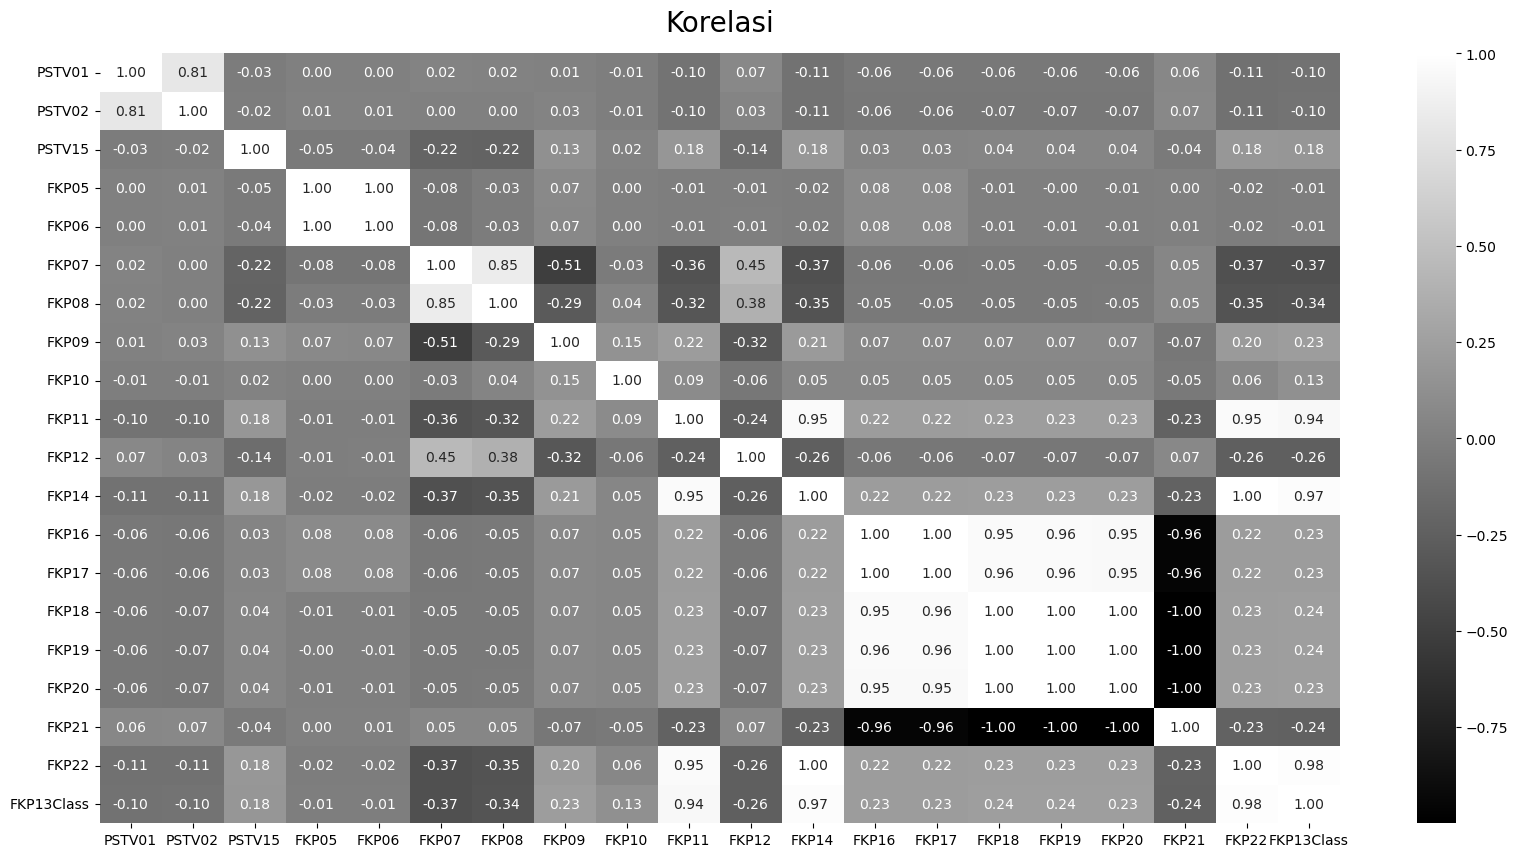

In [23]:
plt.figure(figsize=(20,10))
heatmaps=sns.heatmap(data.corr(),cmap='gray', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':20}, pad=16);

# Preprosessing Data

In [24]:
x = data.drop('FKP13Class', axis = 1)
y = data['FKP13Class']

## Encoding Kolom Kategori

In [25]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

958073632           0.000025
259320919P000811    0.000025
804269476           0.000025
387880120P000493    0.000025
349651019P002103    0.000025
                      ...   
30060219P000030     0.000025
1326480344          0.000025
1121180537          0.000025
319090320P002037    0.000025
1188955927          0.000025
Name: FKP02, Length: 4056898, dtype: float64


2020-02-10    0.250807
2020-03-09    0.249304
2020-03-16    0.246962
2020-03-02    0.246371
2020-01-13    0.245754
                ...   
2020-04-19    0.018512
2020-05-25    0.018314
2020-05-31    0.016712
2020-07-31    0.015184
2020-05-24    0.009934
Name: FKP03, Length: 731, dtype: float64


2020-02-10      0.250931
2020-03-09      0.248761
2020-03-16      0.247159
2020-01-13      0.246346
2020-03-02      0.246075
                  ...   
2021-01-02      0.000271
2021-01-03      0.000123
2021-01-04      0.000074
2019-08-01.1    0.000025
2021-01-09      0.000025
Name: FKP04, Length: 737, dtype: float64


J06    8.912681
I10 

In [26]:
# extracting categorical columns
cats_col = data.select_dtypes(include = ['object'])

In [27]:
cats_col.head()

,FKP02,FKP03,FKP04,FKP14A,FKP15,FKP15A
0,958073632,2019-08-01,2019-08-01.1,Unnamed: 15,9999.1,9999.2
1,449590620P000054,2020-06-17,2020-06-17,K29,K297,"Gastritis, unspecified"
2,467490619P000001,2019-06-01,2019-06-01,Z30,Z309,"Contraceptive management, unspecified"
3,254321219Y002368,2019-12-21,2019-12-21,I10,I10,Essential (primary) hypertension
4,88681119P000020,2019-11-04,2019-11-04,I11,I110,Hypertensive heart disease with (congestive) h...


In [28]:
# printing unique values of each column
for col in cats_col.columns:
    print(f"{col}: \n{cats_col[col].unique()}\n")

FKP02: 
['958073632' '449590620P000054' '467490619P000001' ... '962412926'
 '273170420P000003' '1188955927']

FKP03: 
['2019-08-01' '2020-06-17' '2019-06-01' '2019-12-21' '2019-11-04'
 '2020-07-15' '2019-07-17' '2019-11-07' '2019-06-13' '2020-07-10'
 '2019-05-04' '2019-01-08' '2020-03-17' '2019-10-05' '2019-03-13'
 '2019-12-24' '2019-12-01' '2019-09-02' '2020-09-15' '2019-03-25'
 '2019-10-31' '2020-06-25' '2019-12-02' '2020-02-26' '2019-08-13'
 '2020-03-13' '2019-11-21' '2020-03-11' '2019-10-15' '2020-03-14'
 '2020-11-05' '2019-07-06' '2019-07-01' '2019-09-17' '2019-11-15'
 '2019-08-05' '2019-01-31' '2019-12-30' '2019-03-28' '2020-01-22'
 '2020-11-12' '2019-05-23' '2019-07-11' '2019-03-21' '2020-04-17'
 '2020-12-08' '2019-10-18' '2020-09-21' '2020-01-20' '2019-12-20'
 '2019-03-31' '2020-10-22' '2019-08-19' '2020-09-28' '2019-08-03'
 '2020-04-06' '2020-10-21' '2020-12-17' '2019-05-02' '2019-07-08'
 '2019-10-17' '2019-11-19' '2019-07-23' '2020-12-09' '2019-01-15'
 '2019-12-16' '2019-10-0

In [29]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
label = lbl.fit_transform(x["FKP15"])
lbl.classes_

array(['9999', '9999.1', 'A00', ..., 'Z99', 'Z992', 'Z999'], dtype=object)

In [30]:
for i, FKP15 in enumerate(lbl.classes_):
      print(FKP15, "=", i)

9999 = 0
9999.1 = 1
A00 = 2
A000 = 3
A001 = 4
A009 = 5
A01 = 6
A010 = 7
A011 = 8
A012 = 9
A013 = 10
A014 = 11
A02 = 12
A020 = 13
A021 = 14
A022 = 15
A028 = 16
A029 = 17
A03 = 18
A030 = 19
A038 = 20
A039 = 21
A04 = 22
A040 = 23
A041 = 24
A042 = 25
A043 = 26
A044 = 27
A045 = 28
A046 = 29
A047 = 30
A048 = 31
A049 = 32
A05 = 33
A050 = 34
A051 = 35
A054 = 36
A058 = 37
A059 = 38
A06 = 39
A060 = 40
A061 = 41
A062 = 42
A063 = 43
A064 = 44
A065 = 45
A066 = 46
A067 = 47
A068 = 48
A069 = 49
A07 = 50
A070 = 51
A071 = 52
A078 = 53
A079 = 54
A08 = 55
A080 = 56
A081 = 57
A082 = 58
A083 = 59
A084 = 60
A085 = 61
A09 = 62
A090 = 63
A099 = 64
A15 = 65
A150 = 66
A151 = 67
A152 = 68
A153 = 69
A154 = 70
A155 = 71
A156 = 72
A157 = 73
A158 = 74
A159 = 75
A16 = 76
A160 = 77
A161 = 78
A162 = 79
A163 = 80
A164 = 81
A165 = 82
A167 = 83
A168 = 84
A169 = 85
A17 = 86
A170 = 87
A171 = 88
A178 = 89
A179 = 90
A18 = 91
A180 = 92
A181 = 93
A182 = 94
A183 = 95
A184 = 96
A185 = 97
A186 = 98
A187 = 99
A188 = 100
A19 = 101
A

## Encoding Kolom Data Numerik

In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056898 entries, 0 to 4056897
Data columns (total 25 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PSTV01  float64
 1   PSTV02  int64  
 2   PSTV15  float64
 3   FKP02   object 
 4   FKP03   object 
 5   FKP04   object 
 6   FKP05   int64  
 7   FKP06   int64  
 8   FKP07   int64  
 9   FKP08   int64  
 10  FKP09   int64  
 11  FKP10   float64
 12  FKP11   float64
 13  FKP12   int64  
 14  FKP14   int64  
 15  FKP14A  object 
 16  FKP15   int32  
 17  FKP15A  object 
 18  FKP16   int64  
 19  FKP17   int64  
 20  FKP18   float64
 21  FKP19   float64
 22  FKP20   float64
 23  FKP21   float64
 24  FKP22   float64
dtypes: float64(9), int32(1), int64(10), object(5)
memory usage: 758.3+ MB


In [33]:
# Extracting the Numerical Columns
nums_col = x.select_dtypes(include = ['int64','float64'])

In [34]:
nums_col

,PSTV01,PSTV02,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22
0,157978748.0,50765420,20.064983,61,6108,3,1,4,1.1,12.0,2,9999,98,9998,98.1,98.2,98.3,98.4,2.1
1,95085112.0,26931775,2.626307,51,5171,9,3,2,1.0,1.0,4,773,98,9998,98.0,98.0,98.0,98.0,1.0
2,224470578.0,227368233,1.051830,35,3516,9,2,1,1.0,3.0,4,1757,98,9998,98.0,98.0,98.0,98.0,1.0
3,63871289.0,62313678,364.741455,34,3402,3,1,4,1.0,1.0,5,621,98,9998,98.0,98.0,98.0,98.0,1.0
4,29915626.0,113446188,1.050523,35,3509,3,1,4,1.0,1.0,1,622,98,9998,98.0,98.0,98.0,98.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056893,212666736.0,91270403,14.246229,35,3505,9,3,2,1.0,12.0,4,9999,98,9998,98.0,98.0,98.0,98.0,2.0
4056894,30859241.0,30859241,3.886934,35,3514,9,2,1,1.0,1.0,5,561,35,3514,9.0,2.0,14.0,99.0,1.0
4056895,8859416.0,8859416,6.146070,11,1171,4,2,1,1.0,13.0,5,9999,98,9998,98.0,98.0,98.0,98.0,2.0
4056896,399491834.0,399491834,26.548826,74,7402,3,1,3,1.0,1.0,2,774,98,9998,98.0,98.0,98.0,98.0,1.0


- Kolom `FKP02`, `FKP03`, `FKP04`, `FKP14A`, `FKP15`, `FKP15A` tidak diikutkan ke dalam model karena merupakan data kategorik. Gagal dilakukan one hot encoding karena jumlah data dan unique values yang terlalu besar, mengakibatkan dimensi yang dihasilkan juga akan sangat besar(?).
- Kolom `PSTV02`, `FKP05`, `FKP06` tidak diikutkan ke dalam model karena memiliki nilai korelasi yang kecil terhadap variabel target (<= 0.1) dan/atau secara konteks tidak berpengaruh.
- Kolom `PSTV01` tetap dimasukkan meski tidak memiliki korelasi, karena nantinya akan digunakan untuk disandingkan dengan target prediksi.

## Menggabungkan Kolom Numerik dan Kategorik

In [35]:
X = pd.concat([nums_col, cats_col], axis = 1)

In [36]:
X.sample(5)

,PSTV01,PSTV02,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,...,FKP19,FKP20,FKP21,FKP22,FKP02,FKP03,FKP04,FKP14A,FKP15,FKP15A
2324412,112108465.0,112108465,127.953659,33,3323,9,4,6,1.0,2.0,...,98.0,98.0,98.0,1.0,440630920P000028,2020-09-03,2020-09-03,K04,K041,Necrosis of pulp
697773,37305522.0,27872798,52.000870,35,3508,3,1,4,1.0,12.0,...,98.0,98.0,98.0,2.0,1063898778,2019-11-29,2019-11-29,NaN,9999,9999
3147264,175157983.0,211212797,2.941463,12,1213,3,1,3,1.0,1.0,...,98.0,98.0,98.0,1.0,123920719P000322,2019-07-11,2019-07-11,R50,R509,"Fever, unspecified"
3113470,61329988.0,61329988,92.130836,33,3315,9,2,1,3.0,7.0,...,98.0,98.0,98.0,1.0,54331119P000290,2019-11-10,2019-11-10,E11,E119,Non-insulin-dependent diabetes mellitus withou...
351712,4514640.0,29103899,13.656794,51,5103,9,3,2,1.0,1.0,...,98.0,98.0,98.0,1.0,201860619P000309,2019-06-27,2019-06-27,M54,M545,Low back pain


## Menghilangkan Kolom Tidak Terpakai

In [37]:
# dropping columns which are not necessary for prediction
to_drop = ['PSTV01','PSTV02','FKP02','FKP03','FKP04','FKP05','FKP06','FKP14A','FKP15A']
x.drop(to_drop, inplace = True, axis = 1)

In [38]:
x.head()

,PSTV15,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP15,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22
0,20.064983,3,1,4,1.1,12.0,2,9999,1,98,9998,98.1,98.2,98.3,98.4,2.1
1,2.626307,9,3,2,1.0,1.0,4,773,3610,98,9998,98.0,98.0,98.0,98.0,1.0
2,1.051830,9,2,1,1.0,3.0,4,1757,9302,98,9998,98.0,98.0,98.0,98.0,1.0
3,364.741455,3,1,4,1.0,1.0,5,621,2853,98,9998,98.0,98.0,98.0,98.0,1.0
4,1.050523,3,1,4,1.0,1.0,1,622,2855,98,9998,98.0,98.0,98.0,98.0,1.0


## Menangani Data Hilang

Berdasarkan pengecekan sebelumnya, dapat diketahui adanya missing values pada kolom:
- `FKP14A` dengan jumlah missing values sebanyak 1380240
- `FKP11`  dengan jumlah missing values sebanyak 1

Solusi:
- Untuk kolom `FKP14A` tidak perlu dilakukan handling karena dia sudah termasuk dalam kolom yang tidak digunakan dalam model. Selain itu, kolom `FKP14A` juga memiliki missing values yang terlalu besar, yaitu 0.340220533 atau sekitar 34%.
- Untuk kolom `FKP11` akan dilakukan imputasi dengan nilai modus.

In [39]:
# Cek jumlah missing data sebelum preprocessing
x.isna().sum()

PSTV15    0
FKP07     0
FKP08     0
FKP09     0
FKP10     0
FKP11     1
FKP12     0
FKP14     0
FKP15     0
FKP16     0
FKP17     0
FKP18     0
FKP19     0
FKP20     0
FKP21     0
FKP22     0
dtype: int64

In [40]:
x['FKP11'].fillna(x['FKP11'].mode().values[0], inplace=True)

In [41]:
# Cek jumlah missing data setelah preprocessing
x.isna().sum()

PSTV15    0
FKP07     0
FKP08     0
FKP09     0
FKP10     0
FKP11     0
FKP12     0
FKP14     0
FKP15     0
FKP16     0
FKP17     0
FKP18     0
FKP19     0
FKP20     0
FKP21     0
FKP22     0
dtype: int64

In [42]:
from imblearn import under_sampling, over_sampling
x_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(x,y)

C:\Users\HP\anaconda3\envs\EnvTensorFlow\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [43]:
print(pd.Series(y_over).value_counts())

1    2634511
0    2634511
Name: FKP13Class, dtype: int64


In [44]:
x_train = x_over
x_train

,PSTV15,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP15,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22
0,20.064983,3,1,4,1.1,12.0,2,9999,1,98,9998,98.1,98.2,98.3,98.4,2.1
1,2.626307,9,3,2,1.0,1.0,4,773,3610,98,9998,98.0,98.0,98.0,98.0,1.0
2,1.051830,9,2,1,1.0,3.0,4,1757,9302,98,9998,98.0,98.0,98.0,98.0,1.0
3,364.741455,3,1,4,1.0,1.0,5,621,2853,98,9998,98.0,98.0,98.0,98.0,1.0
4,1.050523,3,1,4,1.0,1.0,1,622,2855,98,9998,98.0,98.0,98.0,98.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269017,181.005051,3,1,3,1.0,12.0,3,9999,0,98,9998,98.0,98.0,98.0,98.0,2.0
5269018,215.987457,3,1,4,1.0,13.0,3,9999,0,98,9998,98.0,98.0,98.0,98.0,2.0
5269019,1.365679,3,1,3,1.0,12.0,5,9999,0,98,9998,98.0,98.0,98.0,98.0,2.0
5269020,48.429092,3,1,3,1.0,13.0,2,9999,0,98,9998,98.0,98.0,98.0,98.0,2.0


In [45]:
y_train = y_over
y_train

0          1
1          0
2          0
3          0
4          0
          ..
5269017    1
5269018    1
5269019    1
5269020    1
5269021    1
Name: FKP13Class, Length: 5269022, dtype: int64

# Import Data Test

In [46]:
read_file2 = pd.read_csv (r'test_fktp.csv',
                          names=['PSTV01','PSTV02','PSTV15','FKP02','FKP03',
                             'FKP04','FKP05','FKP06', 'FKP07','FKP08',
                             'FKP09','FKP10','FKP11','FKP12','FKP14',
                             'FKP14A','FKP15','FKP15A','FKP16','FKP17',
                             'FKP18','FKP19','FKP20','FKP21','FKP22',
                             'FKP13Class'])

C:\Users\HP\AppData\Local\Temp\ipykernel_30976\1268964362.py:1: DtypeWarning: Columns (3,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  read_file2 = pd.read_csv (r'test_fktp.csv',


In [47]:
df_test = read_file2

In [48]:
x_test=df_test['FKP13Class'].replace('Sehat', 1, inplace = True)
y_test=df_test['FKP13Class'].replace('Belum_Sehat', 0, inplace = True)

In [49]:
data_test = df_test.copy()
data_test.head()

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,...,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,187883292.0,98048784,240.884842,954386050,2019-08-21,2019-08-21.1,31,3172,9,2,...,9999.1,9999.2,98,9998,98.1,98.2,98.3,98.4,2.1,NaN
1,123307139.0,20969999,47.378571,774246805,2019-02-12,2019-02-12,17,1705,3,1,...,9999.0,9999.0,98,9998,98.0,98.0,98.0,98.0,2.0,NaN
2,21416273.0,21416273,5.882927,1202010273,2020-03-27,2020-03-27,64,6402,3,1,...,9999.0,9999.0,98,9998,98.0,98.0,98.0,98.0,2.0,NaN
3,97630052.0,97630052,172.916031,1286640248,2020-07-30,2020-07-30,18,1872,9,2,...,9999.0,9999.0,98,9998,98.0,98.0,98.0,98.0,2.0,NaN
4,124531163.0,124531163,187.203140,1285179242,2020-07-28,2020-07-28,18,1809,9,2,...,9999.0,9999.0,98,9998,98.0,98.0,98.0,98.0,2.0,NaN


In [50]:
# dropping columns which are not necessary for prediction
to_drop = ['PSTV01','PSTV02','FKP02','FKP03','FKP04','FKP05','FKP06','FKP14A','FKP15A']
data_test.drop(to_drop, inplace = True, axis = 1)

In [51]:
data_test["FKP15"] = data_test["FKP15"].astype(str)

In [52]:
from sklearn.preprocessing import LabelEncoder
lble = LabelEncoder()
label = lble.fit_transform(data_test["FKP15"])
lble.classes_

array(['9999', '9999.0', '9999.1', ..., 'Z99', 'Z992', 'Z999'],
      dtype=object)

In [53]:
for i, FKP15 in enumerate(lble.classes_):
      print(FKP15, "=", i)

9999 = 0
9999.0 = 1
9999.1 = 2
A00 = 3
A001 = 4
A009 = 5
A01 = 6
A010 = 7
A011 = 8
A012 = 9
A013 = 10
A014 = 11
A02 = 12
A020 = 13
A022 = 14
A028 = 15
A029 = 16
A03 = 17
A030 = 18
A038 = 19
A039 = 20
A04 = 21
A040 = 22
A041 = 23
A042 = 24
A044 = 25
A045 = 26
A046 = 27
A048 = 28
A049 = 29
A05 = 30
A050 = 31
A051 = 32
A059 = 33
A06 = 34
A060 = 35
A061 = 36
A062 = 37
A063 = 38
A064 = 39
A065 = 40
A067 = 41
A068 = 42
A069 = 43
A07 = 44
A071 = 45
A078 = 46
A079 = 47
A08 = 48
A080 = 49
A081 = 50
A082 = 51
A083 = 52
A084 = 53
A085 = 54
A09 = 55
A090 = 56
A099 = 57
A15 = 58
A150 = 59
A151 = 60
A152 = 61
A153 = 62
A154 = 63
A155 = 64
A156 = 65
A157 = 66
A158 = 67
A159 = 68
A16 = 69
A160 = 70
A161 = 71
A162 = 72
A163 = 73
A164 = 74
A165 = 75
A167 = 76
A168 = 77
A169 = 78
A17 = 79
A170 = 80
A171 = 81
A178 = 82
A179 = 83
A18 = 84
A180 = 85
A181 = 86
A182 = 87
A183 = 88
A184 = 89
A185 = 90
A186 = 91
A187 = 92
A188 = 93
A19 = 94
A190 = 95
A191 = 96
A192 = 97
A198 = 98
A199 = 99
A20 = 100
A201 = 101


In [54]:
data_test['FKP15']  = lble.fit_transform(data_test["FKP15"])

In [55]:
x_test = data_test
x_test

,PSTV15,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP15,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,240.884842,9,2,1,1.1,13,5,9999,2,98,9998,98.1,98.2,98.3,98.4,2.1,NaN
1,47.378571,3,1,3,1.0,12,2,9999,1,98,9998,98.0,98.0,98.0,98.0,2.0,NaN
2,5.882927,3,1,4,1.0,13,2,9999,1,98,9998,98.0,98.0,98.0,98.0,2.0,NaN
3,172.916031,9,2,5,1.0,13,5,9999,1,98,9998,98.0,98.0,98.0,98.0,2.0,NaN
4,187.203140,9,2,5,1.0,13,2,9999,1,98,9998,98.0,98.0,98.0,98.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014220,7.563763,9,2,1,1.0,1,4,1818,6836,36,3602,3.0,1.0,27.0,99.0,1.0,NaN
1014221,11.063568,9,2,1,1.0,1,4,1818,6837,98,9998,98.0,98.0,98.0,98.0,1.0,NaN
1014222,286.792694,3,1,3,1.0,1,5,1818,6836,32,3276,9.0,1.0,33.0,99.0,1.0,NaN
1014223,30.222155,3,1,3,1.0,1,4,1818,6836,16,1606,3.0,1.0,27.0,99.0,1.0,NaN


In [57]:
read_file3 = pd.read_csv(r'submission.csv')
read_file3

C:\Users\HP\AppData\Local\Temp\ipykernel_30976\3008445937.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  read_file3 = pd.read_csv(r'submission.csv')


,Unnamed: 0,FKP02,Status
0,1,954386050,1
1,2,774246805,1
2,3,1202010273,1
3,4,1286640248,1
4,5,1285179242,1
...,...,...,...
1014220,1014221,248870919P000406,0
1014221,1014222,116000620P000034,0
1014222,1014223,160421019P000631,0
1014223,1014224,332670919P000083,0


In [58]:
xtest = read_file3.drop('Status', axis = 1) 
y_test = read_file3['Status']

In [59]:
y_test

0          1
1          1
2          1
3          1
4          1
          ..
1014220    0
1014221    0
1014222    0
1014223    0
1014224    0
Name: Status, Length: 1014225, dtype: int64

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=0)

In [61]:
params={
    "learning_rate":[0.01, 0.05, 0.1],
    "max_depthh":[2, 3, 5, 10, 20, 30],
    "min_child_weight":[1, 5, 100],
    "sub_sample":[0.1, 0.5, 1],
    "colsample_bytree":[0.1, 0.5, 1],
    "colsample_bylevel":[0.1, 0.5, 1],
    "n_estimators":[10,100,200,500,1000]
    }

In [62]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [63]:
classifier = xgboost.XGBClassifier()

In [64]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='f1', n_jobs=-1, cv=5, verbose=3)

In [ ]:
# Convert array into dataframe
#y_pred = pd.DataFrame(y_pred, columns=['Status'])
#y_pred

In [ ]:
#data_output = data_output.drop('Status', axis = 1)
#data_output['Status'] = y_pred['Status'] 
#data_output.rename(columns = {'Unnamed: 0':''}, inplace = True)
#data_output

In [ ]:
#data_to_string = data_output[['','FKP02']].astype('string')
#data_to_string.head()

In [ ]:
#data_num = data_output['Status']
#data_num.head()

In [ ]:
#data_fix = pd.concat([data_to_string, data_num], axis = 1)
#data_fix

In [ ]:
#data_fix.info()

In [ ]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_pred, y_test)

In [ ]:
#import csv
#data_fix.to_csv('submission12.csv',sep=',',quoting=csv.QUOTE_NONNUMERIC,index=False)

# SVM

In [ ]:
#from svm.sklearn import SVC
#modelSVM = SVC(random_state=0)
#modelSVM.fit(X_train,Y_train)

In [ ]:
#from sklearn.metrics import classification_report
#y_pred = modelSVM.predict(X_test)

In [ ]:
from xgboost.sklearn import XGBClassifier
modelXG = XGBClassifier(max_depth=3,
                         learning_rate=0.1, 
                         n_estimators=1000, 
                         subsample=1, 
                         min_child_weight=1,
                         random_state=42,
                         reg_alpha = 0,
                         reg_lambda = 1)
modelXG.fit(X_train,Y_train)

In [ ]:
from sklearn.metrics import classification_report
y_pred = modelXG.predict(X_test)
round(f1_score(Y_test, y_pred),6)

In [ ]:
from xgboost.sklearn import XGBClassifier
modelXG = XGBClassifier(max_depth=2,
                        learning_rate=0.05, 
                        n_estimators=1000, 
                        subsample=1, 
                        min_child_weight=1,
                        random_state=42)
modelXG.fit(X_train,Y_train)

In [ ]:
from sklearn.metrics import classification_report
y_pred = modelXG.predict(X_test)
round(f1_score(Y_test, y_pred),6)

# XGBoost

In [66]:
from xgboost.sklearn import XGBClassifier
modelXG = XGBClassifier(max_depth=3,
                         learning_rate=0.1, 
                         n_estimators=1000, 
                         subsample=1, 
                         min_child_weight=1,
                         random_state=42,
                         reg_alpha = 0,
                         reg_lambda = 1)
modelXG.fit(x_train,y_train)

C:\Users\HP\anaconda3\envs\EnvTensorFlow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\HP\anaconda3\envs\EnvTensorFlow\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:05:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [68]:
from sklearn.metrics import classification_report
y_pred = modelXG.predict(X_test)

In [69]:
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [71]:
from sklearn.metrics import classification_report
y_pred = modelXG.predict(X_test)
round(f1_score(Y_test, y_pred),6)

0.996952